<AxesSubplot:xlabel='qualifier3Name,ActionResultName'>

<Figure size 432x288 with 0 Axes>

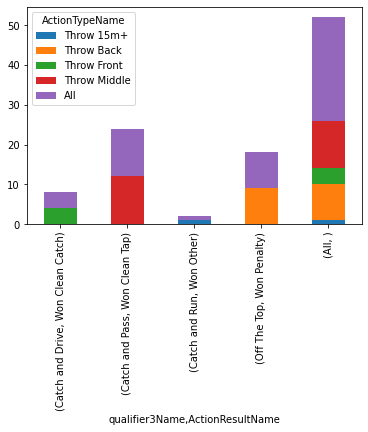

In [35]:
import pandas as pd
import os
import csv
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.cm as cm
import seaborn as sns

#PLID,TEAMIDのインポート
psheets = ["PLID", "TID", "Venue"]
ptid = pd.read_excel(os.getcwd() +"/Resources/Japan Rugby League One Player ID.xlsx", sheet_name = psheets)
tid = pd.DataFrame(ptid["TID"])
venue = pd.DataFrame(ptid["Venue"])
plid = pd.DataFrame(ptid["PLID"])

df = pd.read_csv("/Users/isakakou/Desktop/931097_SUNTvTOSH_BI.csv",encoding='latin1')
#df.team_id = df.team_id.map(tid.set_index('team_id').team_name)
#df.PLID = df.PLID.map(plid.set_index('players_id').player_known_name)
df.columns
df[['playerName', 'teamName','x_coord','y_coord','x_coord_end','y_coord_end',
    'actionName','ActionTypeName','ActionResultName','qualifier3Name',
    'qualifier4Name','qualifier5Name','Metres','PlayNum',
    'SetNum','sequence_id','playerpositionName','refereeName','assistantreferee1Name','assistantreferee2Name']]
dfaction = df.loc[df['actionName'] == 'Lineout Throw']
a = pd.crosstab([dfaction['qualifier3Name'],dfaction['ActionResultName']],dfaction['ActionTypeName'],margins=True)
b = pd.crosstab([dfaction['qualifier3Name'],dfaction['ActionResultName']],dfaction['ActionTypeName'])

plt.gcf().subplots_adjust(wspace=4)
sns.heatmap(b,cmap='Blues', annot=True,annot_kws={'size':20})
plt.clf()
a.plot.bar(stacked=True)